# Aluno:

In [ ]:
#Nome: Marcus Vinicius Guerra Ribeiro
#Matricula: 120007

#Questões

falta fazer:
a)
melhorar b
plotar gráfico de crescimento temporal


##Funções auxiliares

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [ ]:
def gerarDadosEPlotar(funcao, title):
    tamanhos = [10, 100, 1000, 10000, 50000]
    high = 500
    num_operacoes = []
    tempos = []

    for N in tamanhos:
        arr = np.random.randint(0, high, N)

        operacoes_list = []
        tempos_list = []

        for _ in range(100):
            inicio = time.time()
            operacoes = funcao(arr)
            fim = time.time()

            tempo_decorrido = fim - inicio

            operacoes_list.append(operacoes)
            tempos_list.append(tempo_decorrido)

        media_operacoes = np.mean(operacoes_list)
        media_tempos = np.mean(tempos_list)

        num_operacoes.append(media_operacoes)
        tempos.append(media_tempos)

    print(num_operacoes)
    print(tempos)

    plt.figure(figsize=(10, 6))
    plt.plot(tamanhos, num_operacoes, marker='x', markerfacecolor='red', markeredgecolor='red')
    plt.title(f'Número Médio de Operações de Ordenação - {title}')
    plt.xlabel('Tamanho do Array (N)')
    plt.ylabel('Número Médio de Operações')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(tamanhos, tempos, marker='x', markerfacecolor='red', markeredgecolor='red')
    plt.title(f'Tempo Médio de Execução - {title}')
    plt.xlabel('Tamanho do Array (N)')
    plt.ylabel('Tempo Médio (segundos)')
    plt.grid(True)
    plt.show()

##A)

### Por que observa-se esse limite inferior Ω(nlogn) para os algoritmos da Tabela 1? e Prove esse limite inferior para a performance do pior caso dos algoritmos matematicamente com suas palavras de acordo com as leituras que você realizou.

A barreira de Ω(n log n) é o limite inferior para a complexidade média de algoritmos de ordenação baseados em comparações. Isso ocorre porque, em algoritmos desse tipo, cada comparação ajuda a dividir os estados possíveis da ordenação em duas partes. Como existem n! maneiras diferentes de ordenar n elementos, o número mínimo de comparações necessárias pode ser modelado como a altura de uma árvore binária com n! nós. Usando a aproximação de Stirling, pode-se demonstrar que essa altura é Ω(n log n), provando que qualquer algoritmo de ordenação baseado em comparações precisa de, no mínimo, esse número de operações.

### Isso se aplica a todos algoritmos de ordenação?

Não, isso se aplica apenas a algoritmos de ordenação baseados em comparação, se soubermos mais sobres os elementos que estão dentro do array, podemos ter diferentes complexidades. Como por exemplo, se formos ordenar uma lista onde sabemos que todos os elementos são binários, teremos uma complexidade de Ω(n).

###Referencias

https://stackoverflow.com/questions/7155285/what-are-the-rules-for-the-%CE%A9n-log-n-barrier-for-sorting-algorithms

https://pt.wikipedia.org/wiki/F%C3%B3rmula_de_Stirling

##B)

In [ ]:
def mergeSort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    leftHalf = arr[:mid]
    rightHalf = arr[mid:]

    sortedLeft = mergeSort(leftHalf)
    sortedRight = mergeSort(rightHalf)

    return merge(sortedLeft, sortedRight)

def merge(left, right):
    result = []
    i = j = 0

    #print("Tamanho total do array")
    #print(len(left) + len(right))

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    result.extend(left[i:])
    result.extend(right[j:])

    return result

Neste código, devemos analisar primeiro as 2 chamadas recursivas do mergesort(), a sortedLeft e a sortedRight. Como neste exemplo o pivot é escolhido como o elemento mais ao meio, essas 2 chamadas então dividem o vetor no meio, então podemos dizer que suas complexidades são respectivamente T(n/2) e T(n/2).

A seguir, devemos analisar a chamada da função merge, cujo objetivo é combinar e ordenar os vetores left e right. Primeiramente, é necessário identificar a operação básica, que neste caso é:

if left[i] < right[j]

Onde ao decorrer do código, ela ira juntando os pedaços dos arrays em apenas um ordenado. Para facilitar os cálculos, vamos levar em consideração o pior caso, que é a ultima chamada a função merge(), onde o tamanho de left e right é n/2, ou seja, o tamanho total é n/2 + n/2 = n. Como no pior caso também é onde o algoritmo irá percorrer o while até o ultimo caso, ou seja, até (i+j-1) onde i representa o tamanho de left e j, o de right, que somados dão n. Desta forma no pior caso a função merge nunca passará de n-1, então, podemos dizer que a função merge pertence O(n-1), para faciltar os cálculos vamos remover a constante, e então teremos O(n).

Por fim, temos o seguinte:

def mergeSort(arr):
    if len(arr) <= 1:  ----> O(1) pois é uma operação básica
        return arr

    sortedLeft = mergeSort(leftHalf) -----> T(n/2)
    sortedRight = mergeSort(rightHalf) --------> T(n/2)

    return merge(sortedLeft, sortedRight) ---------> O(n)

Logo somando tudo:

T(n) = O(1) + T(n/2) + T(n/2) + O(n)  -> discarta O(1) pois é uma constante
T(n) = 2T(n/2) + n                    -> pronto para usar o teorema mestre

Usando o teorema mestre temos:

a = 2
b = 2
f(n) = n
onde o log2^2 = 1

portanto isso se encaixa no caso 2 onde:

f(n) é : Θ (n^1)
f(n) é : Θ (n)

Logo:

T(n) é Θ(n logn)





###Referencias

https://www.w3schools.com/dsa/dsa_algo_mergesort.php

##C)

###função que calcula as operações básicas

In [ ]:
def contaOperacoes(unsortedArr):
    operacoesBasicas = [0]

    def mergeSort(arr):
        if len(arr) <= 1:
            return arr

        mid = len(arr) // 2
        leftHalf = arr[:mid]
        rightHalf = arr[mid:]

        sortedLeft = mergeSort(leftHalf)
        sortedRight = mergeSort(rightHalf)

        return merge(sortedLeft, sortedRight)

    def merge(left, right):
        result = []
        i = j = 0

        while i < len(left) and j < len(right):
            operacoesBasicas[0] += 1
            if left[i] < right[j]:
                result.append(left[i])
                i += 1
            else:
                result.append(right[j])
                j += 1

        result.extend(left[i:])
        result.extend(right[j:])

        return result

    sortedArr = mergeSort(unsortedArr)
    return operacoesBasicas[0]



Com o objetivo de responder melhor a última pergunta da letra E foi adicionado tanto um gráfico que conta o tempo de execução, mais um valor (50000), assim como todo o código foi executado 100 e foi extraida a média

[20.0, 546.0, 8696.0, 120400.0, 718071.0]
[4.498004913330078e-05, 0.0004919528961181641, 0.00610753059387207, 0.08401361227035523, 0.4520265245437622]


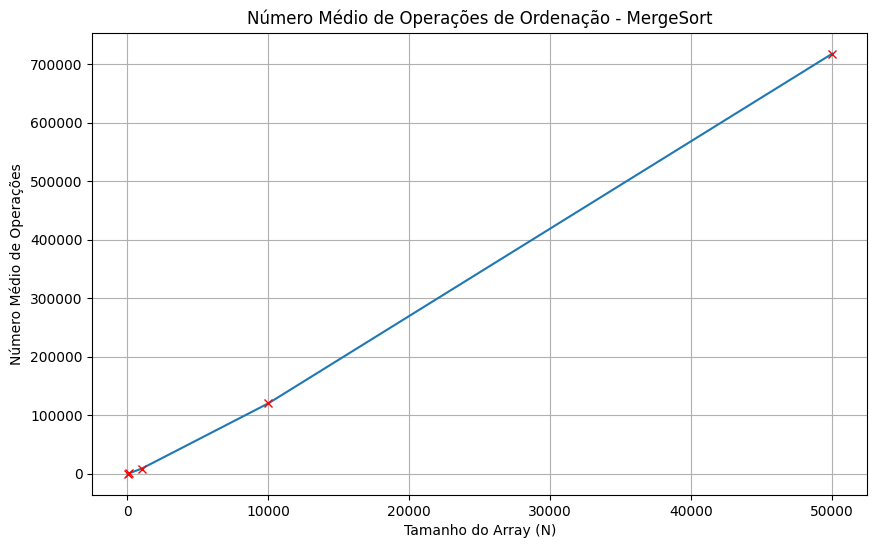

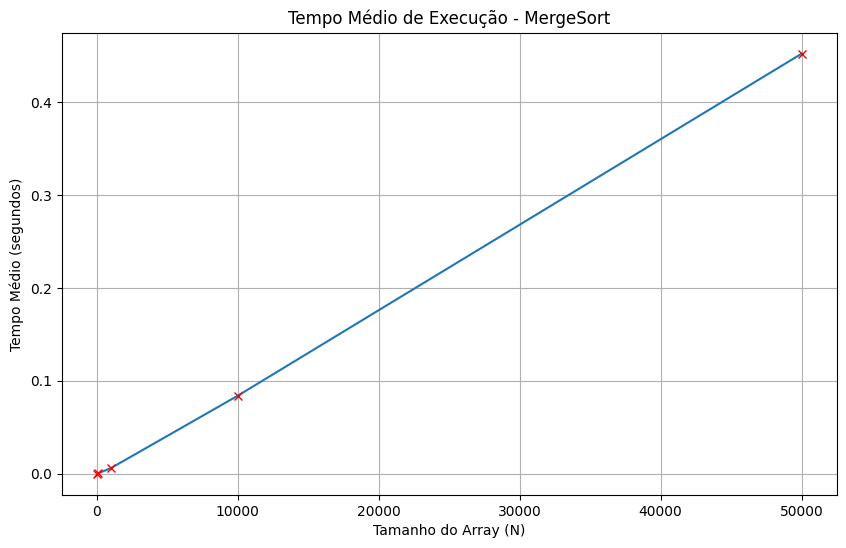

In [ ]:
gerarDadosEPlotar(contaOperacoes, 'MergeSort')

##D) Counting Sort

In [ ]:
def count_sort(input_array):
    M = max(input_array)
    n,m =0,0
    count_array = [0] * (M + 1)

    #este loop irá rodar N (tamanho do array) vezes
    for num in input_array:
      n += 1
      count_array[num] += 1

    #este irá rodar M (tamanho do array auxiliar) vezes
    for i in range(1, M + 1):
      m += 1
      count_array[i] += count_array[i - 1]

    output_array = [0] * len(input_array)

   #este loop irá rodar N (tamanho do array) vezes
    for i in range(len(input_array) - 1, -1, -1):
        n += 1
        output_array[count_array[input_array[i]] - 1] = input_array[i]
        count_array[input_array[i]] -= 1
    n + m
    return n + m

Este algoritmo possui 3 operações básicas, que são os loops:


1.for num in input_array:

como irá percorrer o array inteiro, o custo dessa operação é O(n)

2.for i in range(1, M + 1):

como irá percorrer o array secundario inteiro, o custo desta operação é O(m)


3.for i in range(len(input_array) - 1, -1, -1):

como irá percorrer o array inteiro, o custo desta operação é O(n)


Somando todos os custos temos:

Complexidade = O(n) + O(m) + O(n)
Complexidade = O(2n + m)

como vimos em aula constantes multiplicativas podem ser ignoradas, logo:

Complexidade = O(n + m)


###Referencias

https://www.geeksforgeeks.org/counting-sort/

##E)

[24.0, 540.0, 8726.0, 120463.0, 718061.0]
[6.119251251220704e-05, 0.0008336877822875976, 0.01099186658859253, 0.07887701272964477, 0.4803043866157532]


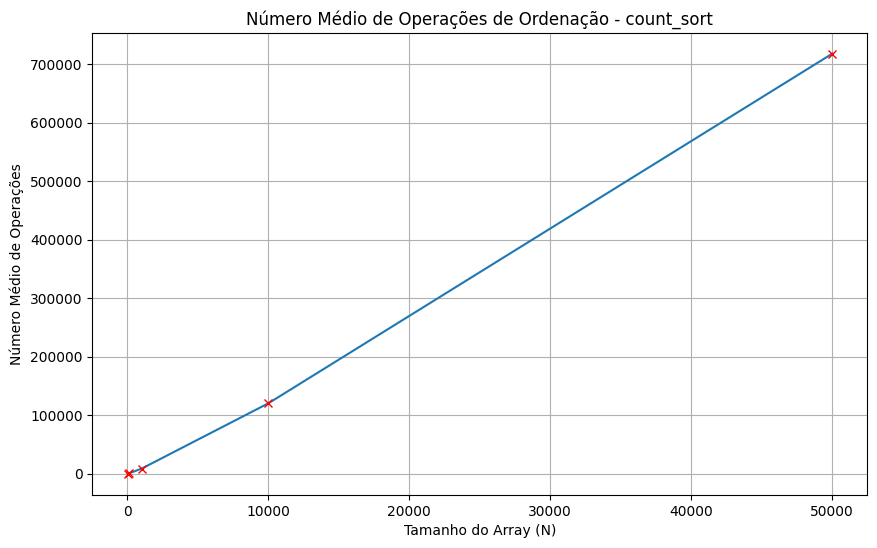

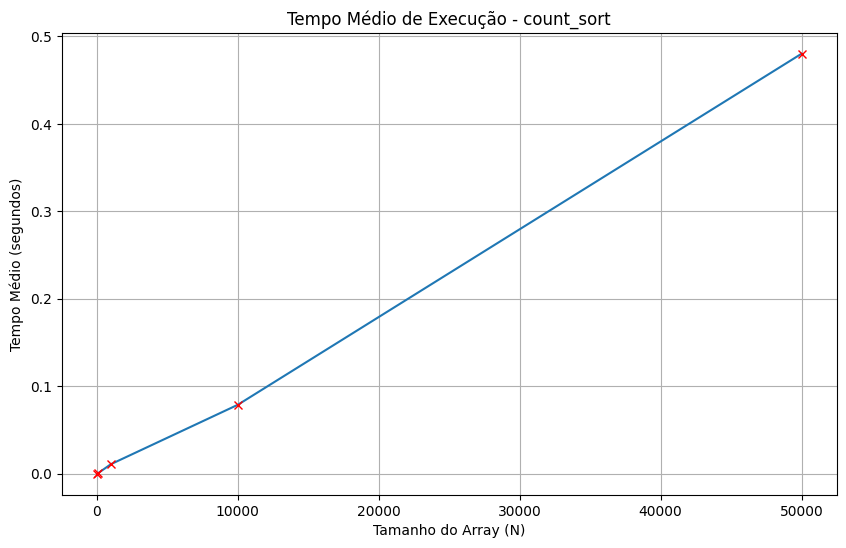

In [ ]:
gerarDadosEPlotar(contaOperacoes, 'count_sort')

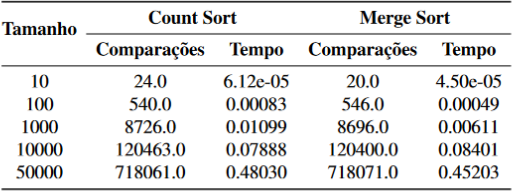

É possivel observar que tanto em questão de tempo como em questão do número de comparações, o Count Sort e o Merge Sort são bem parecidos. Ainda mais lidando com entradas baixas onde o fato do Count Sort ser linear ainda não difere muito do n log n do Merge sort, produzindo resultados bem parecidos. Mas que contudo o Merge sort ainda se demonstra levemente melhor.